In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

In [103]:
# Calculate Distance between any two given points
def euclid_distance(train_point, given_point):
    distance = np.sum((train_point-given_point)**2)
    return np.sqrt(distance)


# Calculate distance from a given point to all other points
# and keep track of the respective classes for those distances
# and eventually return sorted list of distances
def calc_distance_from_all(all_points, given_point, predictions):
    all_distances = []
    for i, each in enumerate(all_points):
        distance = euclid_distance(each, given_point)
        all_distances.append((distance,int(predictions[i])))
    all_distances.sort(key=lambda tup: tup[0])
    return all_distances



# Get the "n" defined neighbours from a list of sorted distances
def get_neighbours(distances, count):
    return distances[:count]




# Takes a given point and predicts the class based on all other points
def predict(all_points, given_point, predictions):
    distances = calc_distance_from_all(all_points,given_point,predictions)
    neighbours = get_neighbours(distances, 4)
    
    op = [row[-1] for row in neighbours]
    prediction = max(set(op), key=op.count)
    return prediction



# Get how accurate our system is based on a new set of test points
# for which we already know the right answer to
def accuracy(basex, basey, testx, testy):
    correct = 0 
    
    for i in range(len(testx)):
        p = predict(basex, testx[i], basey)
        if p == testy[i]:
            correct += 1
            
    return f"Accuracy: {correct*100/len(testy)}%"

In [104]:
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
Y = pd.DataFrame(wine.target, columns=['target'])
data = pd.concat([X, Y], axis = 1)


In [112]:
X = (X-X.min()) / (X.max()-X.min())

In [135]:
xtrain, xtest, ytrain, ytest = train_test_split(X,Y, test_size=0.3, random_state=47)

In [136]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [137]:
correl = data.corr('pearson')
correl

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


In [138]:
abs(correl['target']).sort_values()

ash                             0.049643
magnesium                       0.209179
color_intensity                 0.265668
alcohol                         0.328222
malic_acid                      0.437776
nonflavanoid_phenols            0.489109
proanthocyanins                 0.499130
alcalinity_of_ash               0.517859
hue                             0.617369
proline                         0.633717
total_phenols                   0.719163
od280/od315_of_diluted_wines    0.788230
flavanoids                      0.847498
target                          1.000000
Name: target, dtype: float64

In [139]:
f1 = 'od280/od315_of_diluted_wines'
f2 = 'flavanoids'

basex = np.array(xtrain[[f1, f2]])
basey = np.array(ytrain)

xtest = np.array(xtest[[f1, f2]])
ytest = np.array(ytest)

basey

array([[1],
       [2],
       [2],
       [2],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [2],
       [2],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [2],
       [1],
       [1],
       [1],
       [1],
       [2],
       [0],
       [1],
       [0],
       [0],
       [0],
       [2],
       [1],
       [2],
       [2],
       [1],
       [1],
       [1],
       [2],
       [2],
       [1],
       [0],
       [0],
       [0],
       [2],
       [1],
       [1],
       [2],
       [1],
       [0],
       [1],
       [2],
       [0],
       [1],
       [1],
       [1],
       [2],
       [0],
       [1],
       [2],
       [2],
       [2],
       [1],
       [0],
       [2],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [2],
       [2],
       [1],
       [1],
       [2],
       [2],
    

In [140]:
basey = np.ravel(basey)
# basey = [row[0] for row in basey]
basey

array([1, 2, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 2, 2, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 2, 1, 1, 1, 1, 2, 0, 1, 0, 0, 0, 2, 1, 2, 2, 1, 1, 1,
       2, 2, 1, 0, 0, 0, 2, 1, 1, 2, 1, 0, 1, 2, 0, 1, 1, 1, 2, 0, 1, 2,
       2, 2, 1, 0, 2, 1, 0, 0, 1, 0, 0, 2, 2, 1, 1, 2, 2, 2, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 2, 0, 0, 1, 2, 1, 0, 1, 0, 1, 0, 0, 2, 2, 1, 1, 1,
       1, 0, 0, 1, 2, 0, 1, 0, 1, 1, 0, 1, 2, 2])

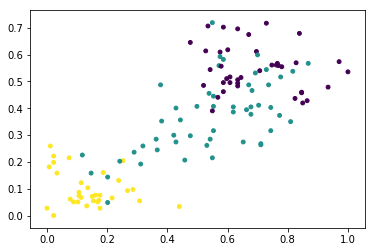

In [141]:
x = pd.DataFrame(basex)
y = basey

plt.scatter(basex[:,0], basex[:,1], c=basey, s=15)

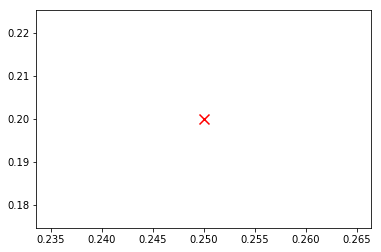

In [142]:
plt.scatter(0.25, 0.2, c='red', marker='x', s=100)

In [143]:
print(accuracy(basex, basey, xtest, ytest))

Accuracy: 85.18518518518519%
